In [119]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [114]:
df = pd.read_csv('movies.csv')

In [115]:
df = df.rename(columns={'ranking of movie\r\n': 'MovieRank', 'movie name\r\n': 'MovieName', 
'runtime': 'Duration', 'DETAIL ABOUT MOVIE\n': 'Description', 'DIRECTOR\r\n': 'Director',
 'ACTOR 1\n': 'Actor1', 'ACTOR 2\n': 'Actor2', 'ACTOR 3': 'Actor3', 'ACTOR 4': 'Actor4',
 'GROSS COLLECTION\r\n': 'Revenue', 'certificate': 'Certificate', 'genre': 'Genre', 'RATING': 'Rating',
 'metascore': 'Metascore', 'votes': 'Votes'})
df['Duration'] = df['Duration'].apply(lambda x: x.replace(' min', ''))

In [116]:
df['Duration'] = df['Duration'].apply(lambda x: float(x.replace(' min', '')))
df['Revenue'] = df['Revenue'].apply(lambda x: float(str(x).replace('$' , '').replace('M', '')))
df['Year'] = df['Year'].apply(lambda x: float((x.replace('-', '').replace('(I) ', '').replace('(', '').replace(')', '').replace('I', ''))))
df['Votes'] = df['Votes'].apply(lambda x: float(x.replace(',', '')))

In [117]:
print(df.shape)
df.dropna(inplace=True)
print(df.shape)

(1000, 16)
(738, 16)


In [144]:
numeric_feat_names = ['Duration', 'Revenue', 'Year', 'Rating', 'Metascore', 'Votes']

In [145]:
from sklearn.preprocessing import StandardScaler
X = df[numeric_feat_names]
X_std = StandardScaler().fit_transform(X)

In [146]:
sklearn_pca = PCA(n_components=2)
X_reduced  = sklearn_pca.fit_transform(X_std)

In [147]:
X_reduced.shape

(738, 2)

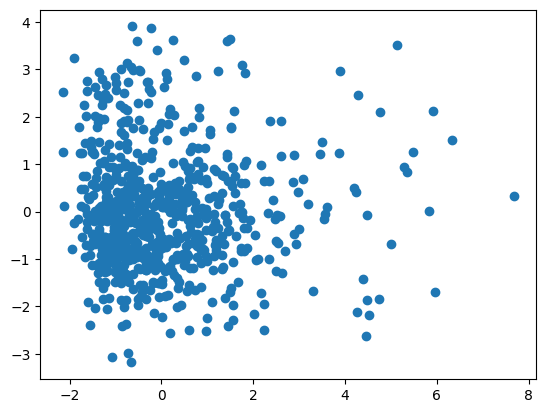

In [148]:
from mpl_toolkits.mplot3d import Axes3D

plt.scatter(X_reduced[:,0], X_reduced[:,1])
plt.show()